<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/7_Estadistica/estadistica.ipynb"><img src='https://colab.research.google.com/assets/colab-badge.svg'/></a>

# Introducción a la Estadística

# Tabla de Contenidos

  - Introducción y Motivación 
    - Conceptos principales
    - Estadística y ML
  - Estadística Descriptiva
    - Tendencia central
    - Analisis exploratorio 
      - Histograma
      - BoxPlot
      - Matriz de Correlación
  - Estadística Inferencial
    - Metodologia paramétrica y no-paramétrica
    - Estimadores y Parametros 
    - Prueba de hipótesis
    - Intervalos de Confianza
    - P-valor
    - Significancia estadistica
    - Regresión Lineal 


## PyEPH

Usaremos la nueva y flamante librería de [github.com/institutohumai/PyEPH](https://github.com/institutohumai/pyeph) para analizar la Encuesta Permanente de Hogares

In [ ]:
!pip install pyeph

In [ ]:
import pyeph
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats

### Traemos las bases de datos

In [ ]:
# más info https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_diseno_reg_t414.pdf
eph = pyeph.get(data="eph", year=2021, period=2, base_type='individual') 
canastas = pyeph.get(data="canastas") # canasta basica total y alimentaria
adequi = pyeph.get(data="adulto-equivalente") # adulto equivalente


Obtenido con exito: base_individual_2021T2.zip 


CBT y CBA mas actualizada que se obtuvo: 2021-12 

Obtenido con exito: adulto_equivalente.zip 


In [ ]:
eph.head(10)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPYQHMLKNCDEHJGH00699689,2021,2,1,1,1,40,S,23,214,...,NaN,5,27000,6,7.0,8,6.0,NaN,8,218
1,TQRMNOPYQHMLKNCDEHJGH00699689,2021,2,1,2,1,40,S,23,214,...,NaN,5,27000,6,7.0,8,6.0,NaN,8,218
2,TQRMNOPYSHMLKNCDEHJGH00699098,2021,2,1,1,1,40,S,23,192,...,NaN,10,46000,9,9.0,10,8.0,NaN,9,196
3,TQRMNOPYSHMLKNCDEHJGH00699098,2021,2,1,2,1,40,S,23,192,...,NaN,10,46000,9,9.0,10,8.0,NaN,9,196
4,TQRMNOPYSHMLKNCDEHJGH00699098,2021,2,1,3,1,40,S,23,192,...,NaN,10,46000,9,9.0,10,8.0,NaN,9,196
5,TQRMNOPYSHMLKNCDEHJGH00699098,2021,2,1,4,1,40,S,23,192,...,NaN,10,46000,9,9.0,10,8.0,NaN,9,196
6,TQRMNOSVQHMLKNCDEHJGH00698780,2021,2,1,1,1,40,S,23,250,...,NaN,3,"10333,33",2,2.0,3,2.0,NaN,3,255
7,TQRMNOSVQHMLKNCDEHJGH00698780,2021,2,1,2,1,40,S,23,250,...,NaN,3,"10333,33",2,2.0,3,2.0,NaN,3,255
8,TQRMNOSVQHMLKNCDEHJGH00698780,2021,2,1,3,0,40,S,23,250,...,NaN,3,"10333,33",2,2.0,3,2.0,NaN,3,255
9,TQRMNOSVTHMLKNCDEHJGH00702242,2021,2,1,1,1,40,S,23,187,...,NaN,2,20000,5,5.0,6,4.0,NaN,6,188


In [ ]:
eph['ITF']

0         54000
1         54000
2        184000
3        184000
4        184000
          ...  
47080         0
47081         0
47082     42000
47083     42000
47084     42000
Name: ITF, Length: 47085, dtype: int64

# Introducción: Motivación y Conceptos Principales

## Motivación

La estadística es la ciencia de extraer conclusiones a partir de datos. A diferencia de la probabilidad que se pregunta a priori sobre posibles eventos futuros, la estadística va a partir de preguntas y buscará encontrar evidencia para poder responderlas.


Algunas preguntas pueden ser:

- ¿Responden mis valores observados a cierta distribución?
- ¿Podemos **estimar** algún valor de la población que estoy estudiando?
- ¿Qué tan confiable es una estimación?

Para responderlas, usualmente se cuenta con un repertorio de técnicas que incluyen:

- Optimización, minimizando el error del modelo con respecto a los datos observados (ej. cuadrados mínimos)
- Máxima verosimilitud
- Algoritmo de esperanza-maximización
- Simulación (simulaciones de montecarlo, bootstrap, permutaciones) 

Ocasionalmente, para problemas sencillos, podemos encontrar soluciones analíticas.

## Bayes vs Frecuentismo

Recordemos: hay dos grandes interpretaciones de la probabilidad, la frecuentista y la Bayesiana. 

Desde una perspectiva mas "_filosofica_", la intepretación frecuentista considera a las frecuencias relativas de los eventos de interes sobre los eventos totales, y define el resultado de la prueba de hipótesis categóricamente considerando si la probabilidad resultante fue o no mayor a un umbral definido. 

La probabilidad Bayesiana en cambio, especifica el grado de incertidumbre que la persona tiene de un evento, el grado de creencia o la 
"probabilidad subjetiva". 

En el sentido mas formal, la probabilidad frecuentista considera a los parametros como un valor fijo mientras que la probabilidad en la vision bayesiana contempla al parametro como la realizacion de un proceso aleatorio (una variable aleatoria) por lo que esta dado por una distribucion de probabilidad (la distribucion a priori) y no es un valor fijo. Esto implica que la probabilidad desde la perspectiva bayesiana tiene una fuente mas de incertidumbre. 

Más información en este [artículo](https://www.netquest.com/blog/es/blog/es/bayesianos-contra-frecuentistas). 

## Machine Learning vs Estadística


Existe la idea como _meme_ de que el Aprendizaje Automático (Machine Learning) es simplemente Estadística con un nuevo nombre marketinero. Y esto es... mayormente cierto! 

Podemos identificar 3 tipos de estadística:
- Descriptiva: enfocada en conocer características de la muestra. Pongamos un caso fácil de Marketing: ¿Cuáles son las características de mi comprador típico? ¿Cuál es la tendencia de ventas? 
- Inferencial: se ocupa de sacar conclusiones, por ejemplo: ¿Hay diferencias en el comportamiento de los clientes de la zona A y de la zona B?
- Prescriptiva: intenta modelar los efectos de intervenciones, midiendo efectos causales. En un escenario ideal, esto se haría con un **experimento controlado**: ¿cómo puedo hacer para aumentar las ventas? ¿Sí hago X modificación, aumentarán los clientes?

El Apredizaje Automático a diferencia de la Estadística tiende a:

1. Partir de los datos disponibles en lugar de la pregunta a responder
2. Ocuparse principalmente de la **predicción** en datos nuevos, en lugar de la **calidad de ajuste** con los datos observados. 

Para esto, en aprendizaje automático se hace una separación entre **datos de entrenamiento y de prueba**, para evaluar las estimaciones en valores no observados previamente. Esto se verá en detalle en las próximas clases. 

# Definiciones



## Conceptos principales

---
| Definición | Descripción |
| --- | --- |
| **Población** |  Todos los valores posibles dado por el modelo generador de los datos, el conjunto completo del que se extrae una muestra estadística.  | 
| **Muestra** |Una porción de la población, una selección aleatoria de miembros de una población. Es un grupo más pequeño extraído de la población que tiene las características de toda la población. Las observaciones y conclusiones extraídas de los datos de la muestra se atribuyen a la población.
| **Inferencia estadística** | Generalización de una muestra a una población con un grado de certeza calculado | 1. Prueba de hipótesis (hoy) <br> 2. Estimación (tutorial anterior) |
| **Parámetro** | Una característica de la población, cualquier cantidad numérica que caracteriza a una población determinada o algún aspecto de ella. Esto significa que el parámetro nos dice algo sobre toda la población.
| **Estadístico** | Variable calculada a partir de los datos de la muestra, una única medida de algún atributo de una muestra. Se calcula aplicando una función (algoritmo estadístico) a los valores de los elementos de la muestra, que se conocen en conjunto como un conjunto de datos. 
| **Estimador** | Es un estadístico cuyos valores se consideran próximos a un parámetro que, por ser generalmente desconocido, se desea estimar. Existen características deseables que pueden o no tener ciertos estimadores, como la **robustez**, o la **insesgadez**. 


### Sesgos Estadísticos


Acabamos de tocar en un recital de jazz, y al finalizar invitamos a la audiencia a comprar nuestro disco. Con el mismo, viene una pequeña encuesta para que nos cuenten si les gustó el show. 

La encuesta otorga da un rotundo 10/10 de resultado. ¿Podemos confiar en el mismo para decir que nuestro recital fue excelente?

Tengamos en cuenta que cuando uno toma una muestra para sacar conclusiones de la población, **se asume que la muestra es aleatoria**. 

Agreguemos un dato. De los 1000 asistentes al recital, fueron 50 los que compraron el disco y respondieron. ¿Te aporta más información?  

Es probable que los que hayan respondido hayan sido justamente los mayores fans de la banda, por lo que **esa muestra no sería representativa de la población por un sesgo de selección.**



Existen muchos sesgos estadísticos a tener en cuenta. Pueden encontrar algunas listas aquí:

- https://data36.com/statistical-bias-types-explained/
- Sesgos cognitivos: https://en.wikipedia.org/wiki/List_of_cognitive_biases

# Estadística Descriptiva


En linea generales como su nombre lo indica con la estadistica descriptiva simplemente tratamos de describir los datos que tenemos, caracterizarlos utilizando medidas cuantitativas que sean utiles y adecuadas.

Podemos pensar cada uno de los elementos de la estadistica descriptiva como aquel que intentar responder una pregunta distinta. 

## Tendencia central

¿Si tomara uno de los valores de mis datos de manera aleatoria, que esperaria ver? 

## Análisis exploratorio



La importancia de las gráficas en un análisis descriptivo.
- Exploración de datos: entender la distribución de los datos que vamos a trabajar es escencial
- Presentación y claridad: Eligiendo las gráficas correctas podemos comprender tendencias y distribuciones de manera visual y práctica.

Flujo de trabajo:
1. Conseguir los datos.
2. Generar preguntas de análisis sobre los datos
2. Encontrar en las visualizaciones respuestas a esas preguntas. Graficar todo lo que sea necesario
4. Sacar conclusiones y comprobarlas estadísticamente. 


### ¿Qué tipo de información graficar?

- Cualquier tipo de iformación sobre los datos y sus variables nos va a permitir tener un comprensión mucho mayor. 
En un análisis preliminar es importante entender como se destribuyen nuestras variables entre la población. 
También es util graficar relaciones entre variables para evaluar su dependencia. 



### Cuando los estadísticos no son suficientes

El conocido cuarteto de Anscombe esta compuesto por cuatro datasets de dos variables que tienen medias y desvíos del mismo valor. 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # sometimes we want to tweak plots
import numpy as np 

df = sns.load_dataset("anscombe")
df.groupby('dataset').describe() # works, but a lil ugly...
df.groupby('dataset').describe().swaplevel(axis=1)[['mean','std']] # just report means and std

mean                 std          
           x         y         x         y
dataset                                   
I        9.0  7.500909  3.316625  2.031568
II       9.0  7.500909  3.316625  2.031657
III      9.0  7.500000  3.316625  2.030424
IV       9.0  7.500909  3.316625  2.030579

Si quisiéramos implementar una regreción lineal sin ver los datos podriamos utilizar los estadísticos obtenidos y genera nuestra recta de regresión: $y = 3 + 0.5*x$

Pero que pasa si graficamos los datos 

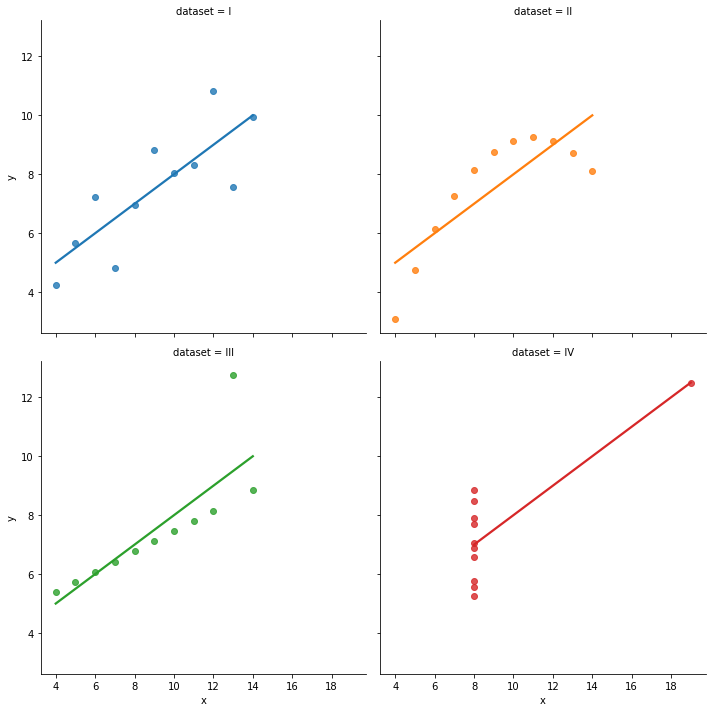

In [ ]:
sns.lmplot(x="x", y="y", data=df, ci=None,
           col="dataset", # do the plot once for each dataset
           col_wrap=2,    # only two plots per row
           hue="dataset", # diff color for each dataset
          )
plt.show()

### Histograma 

Para entender como se distribuye la muestra que tenemos sobre variables de interes vamos a utilizar un histograma. 

El histograma nos va a permitir entender la frecuencia con que aparecen los valores de una variable. 
Para las variables continuas es necesario discretizarlas. Se utilizan "bines" de datos que agrupan los posibles valores en intervalos iguales. De esta manera vemos con cuanta frecuencia aparecen muestras pertenecientes a esos bines en los datos. 

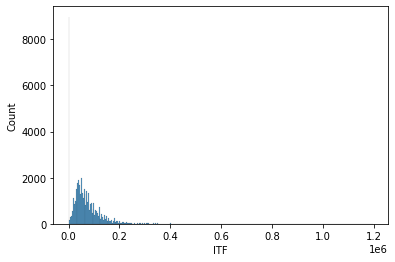

In [ ]:
sns.histplot(data=eph, x="ITF")

El primer problema que encontramos es una gran cantidad de muestras con ITF "0" podemos entender mejor como se distribuye evaluando sus estadísticos. De esta manera sacar errores o posible outliers que afecten la claridad del gráfico y la comprensión de datos 

In [ ]:
eph[['ITF']].describe()

,ITF
count,4.708500e+04
mean,6.206041e+04
std,6.274883e+04
min,0.000000e+00
25%,2.200000e+04
50%,5.000000e+04
75%,8.507100e+04
max,1.197000e+06


In [ ]:
len(eph[eph['ITF'] > 1000000])

14

In [ ]:
len(eph[eph['ITF'] < 1000000]) 

47068

Podemos descartar esos 31 valores para ver mejor la distribución mayoritaria 

In [ ]:
clean_eph  = eph[(eph['ITF']>0) & (eph['ITF']<100000)] 

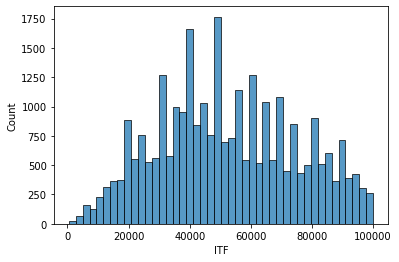

In [ ]:
sns.histplot(data=clean_eph, x="ITF")

Un primer análisis podría indicar una distribución gauseana para la variable 'ITF'. Vemos una mayor cantidad de frecuencia de valores cercanos a la media. Mientras que nos alejamos de la media las frecuencias son cada vez menores. 

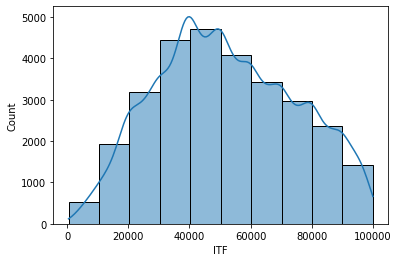

In [ ]:
sns.histplot(data=clean_eph, x="ITF",  bins=10, kde = True)

Al elegir menor cantidad de bins de datos la curva se asemeja cada vez más a una distribución gauseana. Por qué creen que ocurre esto? Qué piensan que es lo más conveniente? usar mas o menos bins? 

### Boxplot

Ahora bien, supongamos que nos interesa entender como funcionan estas distribuciones sobre variables pero dividiendo los datos en grupos o relacionando variables.
En este caso podriamos querer entender la distribución de "ITF" por regiones. 
Es entonces cuando entra en juego la gráfica boxplot. 

![picture](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

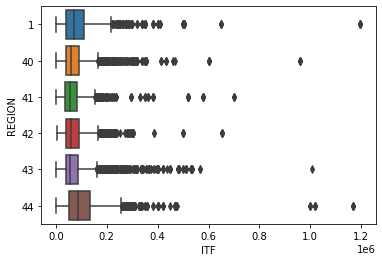

In [ ]:
ax = sns.boxplot(x='ITF', y='REGION', data=eph[eph['ITF'] > 0], orient="h" )

Lo que podemos ver en la data sin filtrar es la cantidad de outliers que existen en los datos. Cómo se traduce esto en el análisis? 

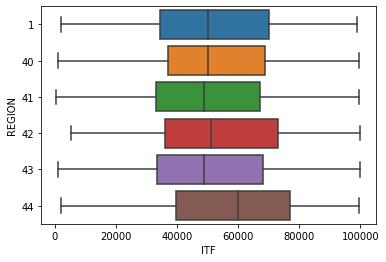

In [ ]:
ax = sns.boxplot(x='ITF', y='REGION', data=clean_eph, orient="h" )

Qué otras variables estaría bueno cruzar? 
Puedo utilizar este tipo de gráfico en variables cuantitativas? 

 ### Matríz de correlación 

Otro herramienta de análisis que nos va a ser de gran ayuda es la matríz de correlación de variables. Esta matriz nos va a permitir entender la relación que existe entre estas variables a travéz de un valor númerico definido por la correlación de Pearson. Aunque se pueden utilizar otro tipo de medidas de correlación a travez de la librería pandas y el método 

```
pd.corr()
```


Vamos a poder vizualizar si la relación entre variables es positiva (cuando aumenta el valor de una variable aumenta la otra) o es negativa (viceverza).

Ahora bien nuestro data set posee gran cantidad de variables. Muchas cualitativas. Las variables categóricas no siempre aportan en este análisis. Por eso es correcto seleccionar las variables de interes para evaluar su correlación. 

In [ ]:
eph.columns[0:50]

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05',
       'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14',
       'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO',
       'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3',
       'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H',
       'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H',
       'PP03I', 'PP03J'],
      dtype='object')

In [ ]:
sample = eph[['ITF', 'NIVEL_ED', 'CH12', 'PP05H', 'PP08D1', 'PP10E', 'P21']]

,ITF,NIVEL_ED,CH12,PP05H,PP08D1,PP10E,P21
ITF,1.000000,0.108313,0.084397,-0.069841,0.479061,-0.033484,0.416066
NIVEL_ED,0.108313,1.000000,0.296068,-0.087342,0.216493,0.010507,0.199665
CH12,0.084397,0.296068,1.000000,-0.073144,0.185546,0.000443,0.217073
PP05H,-0.069841,-0.087342,-0.073144,1.000000,-0.461840,NaN,-0.115107
PP08D1,0.479061,0.216493,0.185546,-0.461840,1.000000,NaN,0.778970
PP10E,-0.033484,0.010507,0.000443,NaN,NaN,1.000000,NaN
P21,0.416066,0.199665,0.217073,-0.115107,0.778970,NaN,1.000000


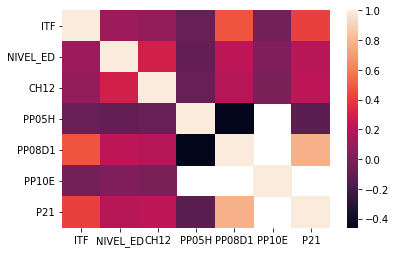

In [ ]:
corr = sample.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

Varías conclusiones se pueden sacar de este gráfico: 


*   Hay variables que parecen tener más relación con "ITF" que otras. Por qué piensan que se da esto? Tiene sentido este resultado? Busquen las variables elegidas y busquen una explicación para los resultados
*   Hay variables que no presentan valores de correlación. Por qué? Investigar en el dataset que valores toman ambas variables. 

Ver la correlación es muy importante. En muchos casos hay variables que representan lo mismo o que tienen un alto grado de correlación. Si queremos hacer un modelo para predecir alguna variable, utilizar otros descriptores que están altamente correlacionado puede ser perjudicial para nuestro modelo. 



# Estadistica Inferencial

## Metodologia parametrica y no-parametrica

En la estadistica parametrica asumismos que 𝑋 es una variable aleatoria con distribucion conocida. Por ejemplo: 

$$ X \sim \mathcal{N}(0,1)$$

La estadistica no parametrica se basa mas en los datos sin hacer tantos supuestos sobre la forma de 𝑋. 

## Estimadores y Parametros

Los estimadores pueden tener distintas propiedades: 
* Insesgadez: la diferencia entre la esperanza matemática del estimador y el valor numérico del parámetro que estima
* Eficiencia: otra manera de denotar la varianza de los estimadores. Un estimador más eficiente es un estimador de menor varianza.
* Consistencia: que la esperanza matemática del estimador cuando la muestra crece (tiende a infinito) sea igual al parámetro que se desea estimar. 
* Robustez (consistencia): la capacidad de mantenerse inalterado de manera significativa si hay una violación de los supuestos de partida en los que se basa la estimación (normalmente, atribuir a la población un determinado tipo de función de distribución que, en realidad, no es la correcta).

## Prueba de Hipótesis

---

* Bajo la **hipótesis nula** no hay diferencia entre la media $ \mu_1 $ y $ \mu_2 $, $$H_0: \mu_1 = \mu_2$$
* Bajo la **hipótesis alternativa**, la media aumentó: $$H_a: \mu_1 > \mu_2$$
    * Esta formulación de la hipótesis alternativa es **de un solo lado**. No probamos que las medias sean distintas, si no que sea mayor que la definida en la hipótesis nula.
    * En caso contrario, podríamos preguntarnos si la media es distinta, es decir de ambos lados (*two-sided*): $H_a: \mu_1 \neq \mu_2$. Muchas veces esta alternativa es más común y sencilla para trabajar. 

### Tipos de errores

**Error de tipo I (falso positivo)** - la refutación incorrecta de la hipótesis nula. Usualmente un error de tipo I lleva a concluir que un supuesto efecto o relación existe cuando en realidad no sucede.

* Por ejemplo, una test que muestra que un paciente tiene una enfermedad cuando en realidad el paciente no la tiene; una alarma de incendio que indica un incendio cuando en realidad no lo hay; o un experimento que indica que un tratamiento médico debería curar una enfermedad cuando en realidad no lo hace.

* La chance de rechazar la hipótesis nula $H_0$, cuando es verdadera, se denota con $\alpha$
* $\rightarrow$ La chance de rechazar la hipótesis nula $H_0$,  cuando es verdadera es $1 - \alpha$





**Error de tipo II (falso negativo)**: el hecho de no rechazar una hipótesis nula que es falsa.

* Por ejemplo, un análisis de sangre que no detecta la enfermedad en un paciente que realmente la tiene; Un incendio y una alarma contra incendios que no suena; o un ensayo clínico de un tratamiento médico que no demuestra que el tratamiento funciona cuando realmente lo hace.
* La probabilidad de **no rechazar la hipótesis nula $H_0$, cuando es FALSA**, denotada por $\beta$

* $\rightarrow$ la posibilidad de **rechazar la hipótesis nula $H_0$, cuando es FALSA** es $1 - \beta$ (también llamada **potencia**)

#### Estadístico de Prueba
---
* Es una medida para ver cuánto se aleja, en probabilidad, lo observado de lo esperado según la hipótesis nula $H_0$
    * Para eso calculamos el estadístico de nuestra muestra. Este va a depender de nuestra pregunta. Por ejemplo para estimar la media poblacional, nuestro estimador va a ser la media de nuestra muestra.
* El resultado del estadístico será o no rechazado en función de su valor y el umbral de probabilidad que hayamos definido de antemano.

* Existe una miríada de estadísticos de prueba, para distintos modelos de probabilidad que se asuman en la hipótesis nula.

Parámetros o Estadísticos


|  | Parámetros | Estadísticos |
| -| ---------- | ---------- |
| **Fuente** | <center> Población </center>| <center> Muestra </center>|
| **Aleatorio** |<center> No </center>|<center> Sí</center>|
| **Calculado** |<center> No</center>| <center> Sí </center>|

## Intervalos de confianza

Los intervalos de confianza son el reflejo del desvio estandard de la distribucion de muestreo para cualquier estimador. El desvio estandard de esta distribucion lo caracterizamos como el error estandard (ES) por lo cual podemos definirlo como

$$ \sqrt{Var(\hat{\theta})} = ES$$

El ES calcula que tanta variabilidad tiene el estimador $\hat{\theta}$ que estemos usando sea cual sea. Para algunos de estos estimadores el calculo es sencillo (por la via analitica) y para otros es mas complejo requiriendo metodos computacionales de aproximacion.

In [ ]:
multiples_medias = []
for i in range(1000):
  media_individual = np.mean(np.random.choice(eph.ITF, 250))
  multiples_medias.append(media_individual)

(array([ 19.,  78., 222., 283., 254.,  92.,  43.,   5.,   3.,   1.]),
 array([51365.58  , 54287.4552, 57209.3304, 60131.2056, 63053.0808,
        65974.956 , 68896.8312, 71818.7064, 74740.5816, 77662.4568,
        80584.332 ]),
 <a list of 10 Patch objects>)

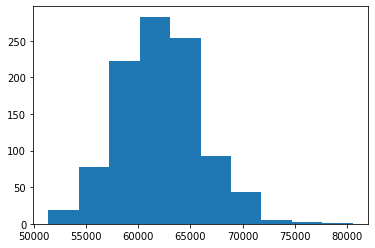

In [ ]:
plt.hist(multiples_medias)

In [ ]:
print(
    'Error Standard aproximado: ' + str(np.std(multiples_medias)),
)

Error Standard aproximado: 3942.482305013511


Segun el teorema central del limite la distribucion de muestreo de la media esta definida como una distribucion normal, por tanto el ES de la media esta definido como

$$\frac{\sigma}{\sqrt{n}} = ES$$

Podemos comparar el resultado con nuestro calculo artesanal

In [ ]:
import math

se = np.std(eph.ITF)/math.sqrt(250)
print(
    'Error standard exacto: ' + str(se)
)

Error standard exacto: 3968.5426364608397


El parecido entre los dos valores es extremadamente bueno ¿Como construimos intervalos de confianza a partir de esto?

$$ IC = \hat{\theta} \pm \phi \hat{\sigma}_\theta$$

Donde $\phi$ es el margen de error del intervalo y $\hat{\sigma}_\theta$ es el ES que calculamos (o mejor dicho estimamos). Mientras mas grande el valor de $\phi$ mas confianza nos da el intervalo y mas grande se vuelve el rango que abarca. 

Por ejemplo, un intervalo de confianza del 95% implica que $\phi$ toma el valor necesario para considerar los percentiles 2.5 y 97.5 de la distribucion de $\hat{\theta}$. 

La manera correcta de interpretar un intervalo de confianza es la siguiente:

> Un intervalo de confianza de $x\%$ implica que $x$ de cada 100 intervalos construidos de esa manera contienen el verdadero valor del parametro $\theta$

Para el caso de la media entonces podemos asumir que $\phi$ toma los valores de los percentiles correspondientes a una distribucion _t_ dado que no conocemos el verdadero valor de $\sigma$. 

In [ ]:
print(
    'Intervalo de confianza del 95%: ',
    np.mean(eph.ITF), '+-', se * stats.t.ppf(0.975, 249)
)

Intervalo de confianza del 95%:  62060.40792184348 +- 7816.191033309212


Pero que pasa cuando no tenemos una formula analitica para el calculo del ES en un determinado estimador como sucede con la mediana. Igualmente podemos utilizar el metodo anterior para llegar a una aproximacion razonable.

In [ ]:
multiples_medianas = []

for i in range(1000):
  mediana_individual = np.median(np.random.choice(eph.ITF, 250))
  multiples_medianas.append(mediana_individual)

(array([  5.,  39.,  88., 168., 393., 160., 106.,  25.,  14.,   2.]),
 array([40200., 42610., 45020., 47430., 49840., 52250., 54660., 57070.,
        59480., 61890., 64300.]),
 <a list of 10 Patch objects>)

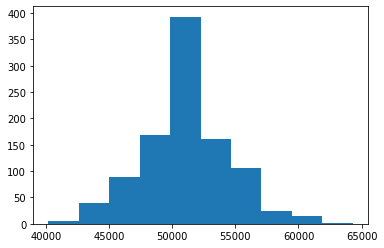

In [ ]:
plt.hist(multiples_medianas)

In [ ]:
print(
    'Error estandard aproximado: ' + str(np.std(multiples_medianas))
)

Error estandard aproximado: 3348.6278181665693


En lugar de utilizar una formula para calcular los percentiles de $\phi$ utilizamos la misma distribucion para extraer los percentiles. 

In [ ]:
print(
    'Intervalo de confianza del 95% aproximado:',
    np.quantile(multiples_medianas, 0.025),
    '-',
    np.quantile(multiples_medianas, 0.975)
)

Intervalo de confianza del 95% aproximado: 45000.0 - 58107.49999999999


## P-valor 
---
* Todas las pruebas de hipótesis al final proveen un p-valor que nos reflejan la cantidad de evidencia que tenemos para nuestras conclusiones, lo que nuestros datos nos dicen de la población. Este valor, una probabilidad, se encuentra entre 0 y 1 y es **la probabilidad de haber encontrado el estadístico de prueba observado (o uno más extremo) asumiendo la $H_0$**
* Corresponde al **área bajo la curva** en la cola de la distribución normal bajo el estadístico $z_{stat}$.
* Para convertir del estadístico Z a un valor: 
* P-valor :  $$\textit{Para } H_a: \mu > \mu_0 \rightarrow P = Pr(Z > z_{stat}) = \textit{hacia la derecha desde } z_{stat} $$

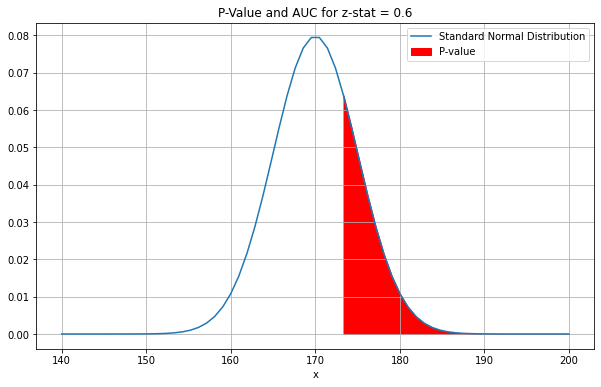

p-val (AUC) = 0.298


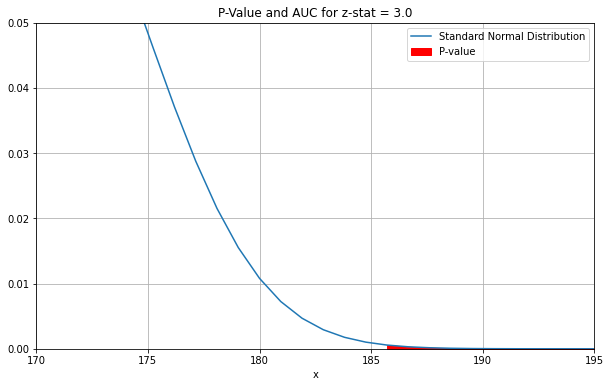

p-val (AUC) = 0.001


In [ ]:
#@markdown P-Valor
import numpy as np
import matplotlib.pyplot as plt

def plot_normal_p_val(x, f_x, observed, title='', xlim=None, ylim=None):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, f_x, label='Standard Normal Distribution')
    ax.fill_between(x[np.where(x.astype(int)==observed)[0][0]:], y1=f_x[np.where(x.astype(int)==observed)[0][0]:],
                    color='red', label="P-value")
    ax.grid()
    ax.legend()
    ax.set_xlabel('x')
    ax.set_title(title)
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    plt.show()

# let's see for the body weight problem
x = np.linspace(140, 200, 64)
mu = 170  # H_0 is true!
sigma = 5  # calcualted for 64 samples
f_x = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_normed = (x - mu) / sigma

plot_normal_p_val(x, f_x, 173, 'P-Value and AUC for z-stat = 0.6')
p_val = np.sum(f_x[np.where(x.astype(int)==173)[0][0]:])
print('p-val (AUC) = {:.3f}'.format(p_val))

plot_normal_p_val(x, f_x, 185, 'P-Value and AUC for z-stat = 3.0', [170, 195], [0, 0.05])
p_val = np.sum(f_x[np.where(x.astype(int)==185)[0][0]:])
print('p-val (AUC) = {:.3f}'.format(p_val))

### Interpretación

---
* Un valor muy chico, (usualmente $\leq$ 0.05) indica una **fuerte evidencia en contra de la $H_0$**, por lo que se rechaza la hipótesis nula.

* Un valor alto ($>$ 0.05) indica evidencia débil, por lo que no se puede descartar la $H_0$.

## Significancia estadística ($\alpha$)

* Es el grado, definido **a priori** que se requiere para rechazar la hipótesis nula, $H_0$.
* Un estadístico de prueba con **valor p menor** al predeterminado se dice que es **estadísticamente significativo**. 


* Algunos p-valores usuales:

|Valor-P &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |Interpretación|
| -----------------------------------------| --------------- |
|$p > 0.05$ | No significativo |
|$0.01 \leq p \leq 0.05$ | Significativo |
|$0.001 \leq p < 0.01$ | Muy Significativo |
|$p < 0.001$ |  Extremadamente significativo |

## Regresion Lineal

El modelo basico de la regresion lineal es 

$$ Y=\beta_0 + \beta_1 X + ɛ$$

El parametro $\beta_0$ nos dice que pasa con $Y$ cuando $X$ vale 0 y $\beta_1$ nos dice la diferencia promedio en $Y$ por el cambio en una unidad de $X$. 

La significancia de cada parametro esta dado por $$t = \frac{\beta_1 - 0}{SE(\beta_1)}$$

El nivel explicativo de la regresion esta dado por el $R^2$ segun $$ R^2 = \frac{SST-SSR}{SST}$$

Para poder crear un modelo de regresión lineal es necesario que se cumpla con los siguientes supuestos:
* No colinealidad: Que las variables independientes no estén correlacionadas entre ellas.
* Linealidad: Que la relación entre las variables sea lineal.
* Independencia: Que los errores en la medición de cada una de las variables explicativas sean independientes entre sí.
* Homocedasticidad: Que los errores tengan una varianza constante.
* Normalidad: Que las variables sigan la Ley Normal.


Vamos a usarlo para respondernos dos preguntas.

In [ ]:
# Vamos a usar el paquete statsmodels para este caso

import statsmodels.api as sm

In [ ]:
#Filtramos del dataset aquellos hogares que corresponden a las dos regiones de interes (GBA es 1 y NOA es 40 siendo los valores minimos).
comparacion_ingresos_hogares = eph[eph['REGION'] < 41]
#Modificamos los codigos
X = comparacion_ingresos_hogares['REGION'].replace(40,0)

#Creamos una constante para usar como ordenada en nuestra variable de interes.
X = X.to_numpy()
X = sm.add_constant(X)

#Creamos nuestra variable de respuesta
y = comparacion_ingresos_hogares['ITF'].values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


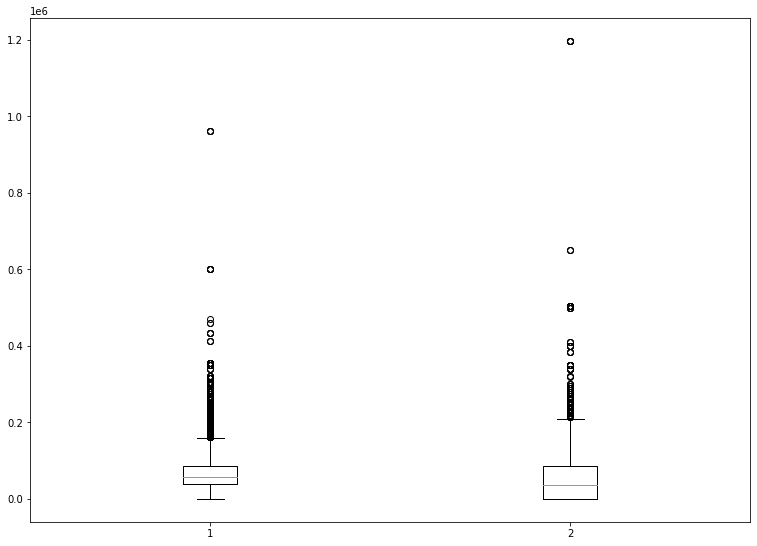

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(
    [
     comparacion_ingresos_hogares.loc[comparacion_ingresos_hogares['REGION'] == 40, 'ITF'],
     comparacion_ingresos_hogares.loc[comparacion_ingresos_hogares['REGION'] == 1, 'ITF']
     ]
)
 
# show plot
plt.show()

In [ ]:
modelo_ingresos = sm.OLS(y, X)
resultados = modelo_ingresos.fit()

In [ ]:
resultados.summary(xname = ['ordenada','region'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     108.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           2.52e-25
Time:                        20:01:14   Log-Likelihood:            -1.9090e+05
No. Observations:               15325   AIC:                         3.818e+05
Df Residuals:                   15323   BIC:                         3.818e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ordenada    6.892e+04    582.171    118.378      0.000    6.78e+04    7.01e+04
region       -1.2e+04   1151.968    -10.417      0.000   -1.43e+04   -9742.048
==============================================================================
Omnibus:                    15486.197   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2041270.658
Skew:                           4.701   Prob(JB):                         0.00
Kurtosis:                      58.753   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

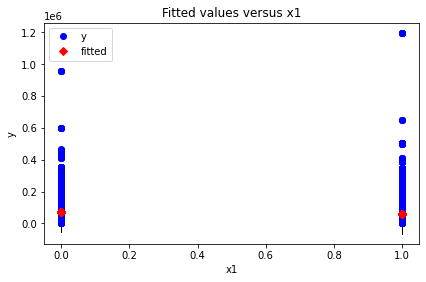

In [ ]:
ajuste = sm.graphics.plot_fit(resultados, 'x1')
ajuste.tight_layout(pad=1.0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


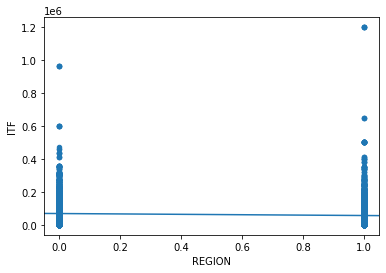

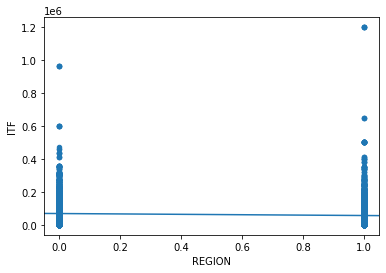

In [ ]:
from statsmodels.graphics.regressionplots import abline_plot

# scatter-plot data
comparacion_ingresos_hogares.REGION.replace(40,0, inplace = True)
ax = comparacion_ingresos_hogares.plot(x='REGION', y='ITF', kind='scatter')

# plot regression line
abline_plot(model_results=resultados, ax=ax)


### T-test

¿Como se comparan los resultados del t-test con los del modelo de regresion sobre los mismos datos?

In [ ]:
from scipy import stats

stats.ttest_ind(
    eph.loc[eph['REGION'] == 1, 'ITF'],
    eph.loc[eph['REGION'] == 40, 'ITF'],
    equal_var = False
)

Ttest_indResult(statistic=-8.452116116248854, pvalue=3.700181004659641e-17)

Otro ejemplo regresión: 

Modelamos el nivel de ingresos en función del nivel educativo.

In [ ]:
import statsmodels.api as sm

    1 = Primaria Incompleta (incluye educación especial)
    2 = Primaria Completa
    3 = Secundaria Incompleta
    4 = Secundaria Completa
    5 = Superior Universitaria Incompleta
    6 = Superior Universitaria Completa
    7 = Sin instrucción
    9 = Ns/Nr

In [ ]:
# para mantener la lógica ordinal, reemplazamos el 7 por 0
eph['NIVEL_ED'] = eph['NIVEL_ED'].replace({7:0})
# descartamos los que no respondieron
eph = eph[(eph['NIVEL_ED'] != 9) & (eph['ITF'] > 0)]
x = eph['NIVEL_ED']
y = eph['ITF']

In [ ]:
# Agregamos una columna de 1 constante para ajustar el intercepto
X = sm.add_constant(x)

In [ ]:
# Ajustamos el modelo de Ordinary Least Squares
model = sm.OLS(y,X)
# el .fit() ajusta los parámetros y devuelve un objeto con los resultados
results = model.fit()

In [ ]:
results.summary(xname=X.columns.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ITF   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1473.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          3.19e-316
Time:                        21:19:41   Log-Likelihood:            -4.7400e+05
No. Observations:               38158   AIC:                         9.480e+05
Df Residuals:                   38156   BIC:                         9.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.57e+04    624.959     89.123      0.000    5.45e+04    5.69e+04
NIVEL_ED    6622.3128    172.552     38.379      0.000    6284.106    6960.519
==============================================================================
Omnibus:                    37864.010   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4452882.200
Skew:                           4.610   Prob(JB):                         0.00
Kurtosis:                      55.112   Cond. No.                         7.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

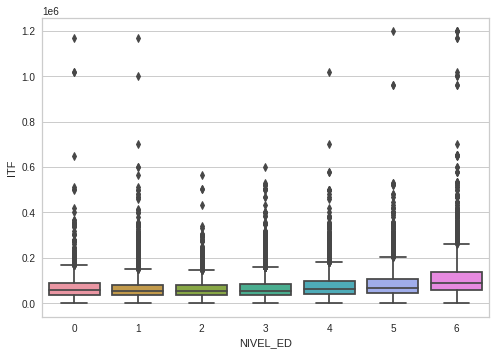

In [ ]:
import seaborn as sns
ax = sns.boxplot(x='NIVEL_ED', y='ITF', data=eph, orient="v" )